<a href="https://colab.research.google.com/github/Nkashyap-anand/human-posture-estimation/blob/main/128_4_TF_CNN_human_posture_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
from time import sleep as s
import cv2
import os
import pandas as pd
import random as rm

In [2]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/training",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
validation_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/validation",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
test_dataset = train.flow_from_directory("/content/drive/MyDrive/posture/testing",
                                    target_size= (512,512),
                                    batch_size= 4,
                                    class_mode="categorical")

Found 2880 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


In [5]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(128,(3,3),activation ="relu", input_shape =(512,512,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(256,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = "relu"),
tf.keras.layers.Dense(4,activation ="softmax")])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 128)      0

In [7]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" ,metrics =["accuracy"])

In [8]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch= 32,
                     epochs= 50,
                     validation_data= validation_dataset)

Epoch 1/50
32/32 [==============================] - 944s 30s/step - loss: 2.0493 - accuracy: 0.4609 - val_loss: 1.3205 - val_accuracy: 0.6052
Epoch 2/50
32/32 [==============================] - 91s 3s/step - loss: 0.9211 - accuracy: 0.5859 - val_loss: 0.8467 - val_accuracy: 0.6635
Epoch 3/50
32/32 [==============================] - 88s 3s/step - loss: 0.6806 - accuracy: 0.7109 - val_loss: 0.7431 - val_accuracy: 0.7271
Epoch 4/50
32/32 [==============================] - 78s 2s/step - loss: 0.6587 - accuracy: 0.7422 - val_loss: 0.6911 - val_accuracy: 0.7344
Epoch 5/50
32/32 [==============================] - 73s 2s/step - loss: 0.4889 - accuracy: 0.8672 - val_loss: 0.6396 - val_accuracy: 0.7625
Epoch 6/50
32/32 [==============================] - 82s 3s/step - loss: 0.5487 - accuracy: 0.8125 - val_loss: 0.6036 - val_accuracy: 0.7781
Epoch 7/50
32/32 [==============================] - 79s 2s/step - loss: 0.4287 - accuracy: 0.8828 - val_loss: 0.5986 - val_accuracy: 0.7823
Epoch 8/50
32/32 [

In [9]:
test_predictions = model.predict(test_dataset)
test_predictions

240/240 [==============================] - 829s 3s/step


array([[5.65901518e-01, 1.08137596e-04, 8.98318598e-04, 4.33092028e-01],
       [3.20403597e-05, 5.70609745e-06, 6.56809832e-04, 9.99305367e-01],
       [8.87526941e-09, 1.00000000e+00, 2.72113287e-09, 5.90032800e-10],
       ...,
       [9.85911175e-09, 1.00000000e+00, 8.88587337e-09, 1.83161473e-15],
       [1.33680822e-02, 2.20896467e-03, 9.22614932e-01, 6.18080050e-02],
       [9.55099722e-07, 6.84802080e-06, 2.34008092e-03, 9.97652113e-01]],
      dtype=float32)

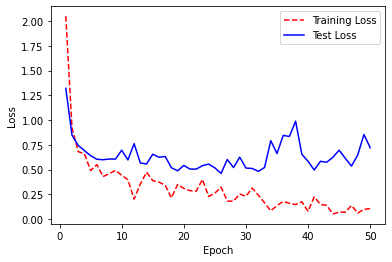

In [10]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model_fit.history['loss']
test_loss = model_fit.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

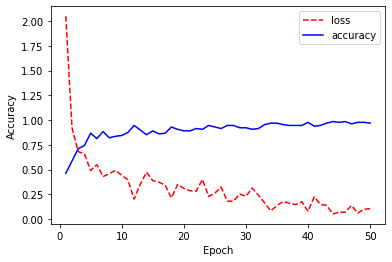

In [11]:
loss = model_fit.history['loss']
accuracy = model_fit.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['loss', 'accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();